# Compare Sectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 

%matplotlib inline

In [2]:
data_dir = os.path.abspath('../database/fit')
print(f'Opening files from {data_dir}')

Opening files from /Users/davidriser/repos/python-analysis/kaon-bsa/database/fit


In [3]:
data = {} 

for sect in range(1,7):
    data[sect] = pd.read_csv(f'{data_dir}/sector_{sect}_sin.csv')
    data[sect]['sector'] = np.repeat(sect, len(data[sect]))
    print(f'Loaded sector {sect} with {len(data[sect])} entries.')

Loaded sector 1 with 25 entries.
Loaded sector 2 with 25 entries.
Loaded sector 3 with 25 entries.
Loaded sector 4 with 25 entries.
Loaded sector 5 with 25 entries.
Loaded sector 6 with 25 entries.


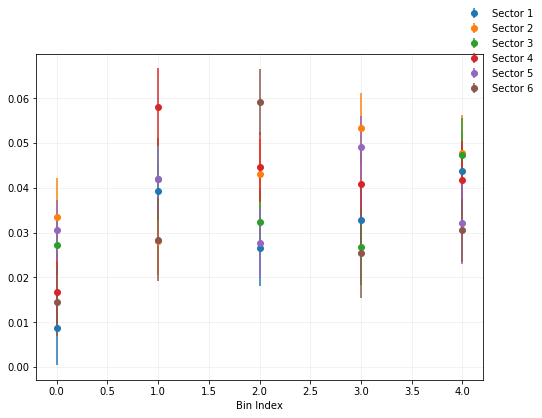

In [4]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    xdf = data[sect][data[sect]['axis'] == "x"]
    ax.errorbar(xdf['axis_bin'], xdf['par_0'], xdf['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False)    

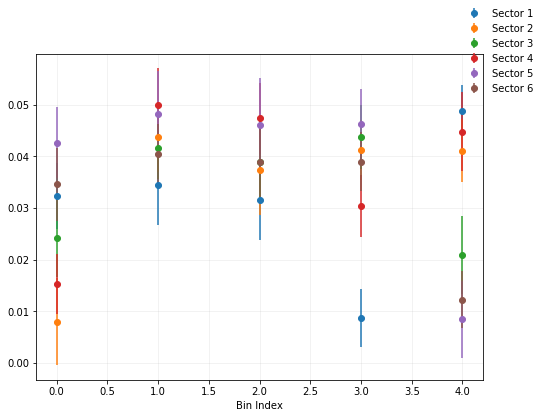

In [5]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "z"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

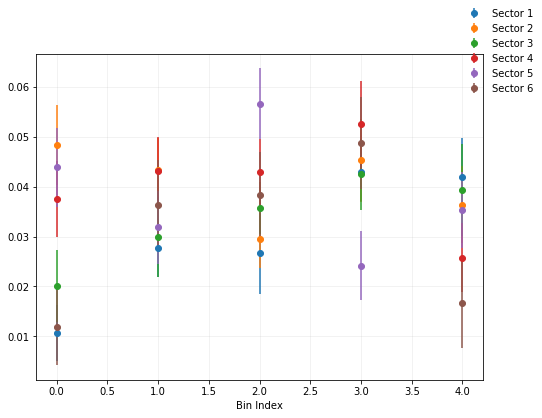

In [6]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "pt"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

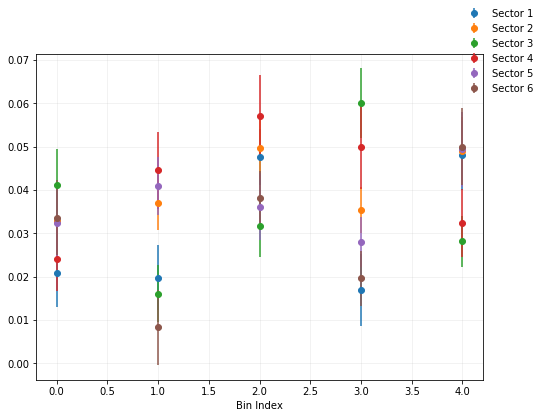

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "q2"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

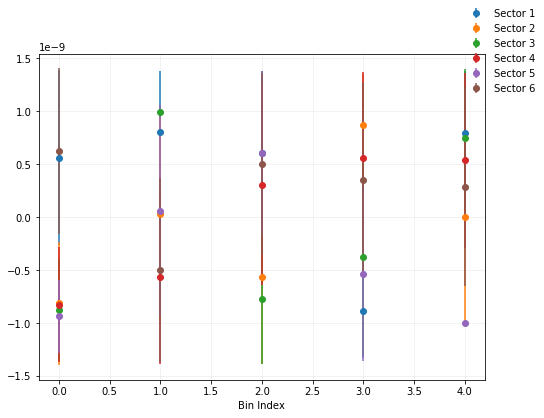

In [8]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "q2"]
    ax.errorbar(df['axis_bin'], df['par_2'], df['err_2'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False)

In [9]:
sector_data = pd.concat([data[i] for i in range(1,7)])

In [10]:
sector_data

,axis,axis_bin,axis_min,axis_max,par_0,par_1,par_2,err_0,err_1,err_2,bootstraps_0,bootstraps_1,bootstraps_2,sector
0,missing_mass,0,0.331363,1.472757,0.041904,1.597668e-10,2.847669e-10,0.006551,9.714012e-10,9.423660e-10,[0.04781584 0.04209245 0.03611376 0.0335091 0...,[ 1.000000e-09 1.000000e-09 1.000000e-09 -1....,[-1.000000e-09 -1.000000e-09 1.000000e-09 1....,1
1,missing_mass,1,1.472757,1.640777,0.040500,-5.050637e-10,-4.640191e-12,0.007431,8.576734e-10,9.949020e-10,[0.05300703 0.05668009 0.02940886 0.03657626 0...,[-9.9999997e-10 -9.9999997e-10 9.9999997e-10 ...,[ 9.9999997e-10 9.9999997e-10 -9.9999997e-10 ...,1
2,missing_mass,2,1.640777,1.822382,0.038894,-7.669024e-10,9.212148e-10,0.007110,6.219888e-10,3.554895e-10,[0.03885689 0.04854898 0.04185189 0.05014869 0...,[-1.000000e-09 -1.000000e-09 9.901239e-10 -1....,[ 1.000000e-09 1.000000e-09 -9.901239e-10 1....,1
3,missing_mass,3,1.822382,2.008805,0.025445,-6.290971e-10,-8.750000e-10,0.007988,7.723177e-10,4.841229e-10,[0.02195325 0.02136499 0.02204316 0.03205394 0...,[-1.000000e-09 1.000000e-09 -1.000000e-09 -1....,[-1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-...,1
4,missing_mass,4,2.008805,2.495670,0.007669,-2.502795e-10,6.249999e-10,0.007125,9.678861e-10,7.806247e-10,[ 0.01628838 0.01075035 0.00743577 0.009168...,[-1.000000e-09 1.000000e-09 -1.000000e-09 -1....,[ 1.e-09 1.e-09 1.e-09 1.e-09 1.e-09 -1.e-...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,z,0,0.121260,0.259865,0.034550,-2.327671e-10,-7.056796e-10,0.007017,9.372303e-10,6.897745e-10,[0.0314187 0.03141476 0.03420248 0.04068432 0...,[ 9.9999997e-10 -9.9999997e-10 -9.9999997e-10 ...,[-9.9999997e-10 -9.9999997e-10 9.9999997e-10 ...,6
21,z,1,0.259865,0.333941,0.040459,-1.000000e-09,4.375000e-10,0.005739,0.000000e+00,8.992184e-10,[0.04559918 0.04886762 0.03602866 0.03745888 0...,[-1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-...,[ 1.e-09 -1.e-09 1.e-09 1.e-09 1.e-09 1.e-...,6
22,z,2,0.333941,0.400212,0.038893,-1.000000e-09,-1.250000e-10,0.006772,0.000000e+00,9.921567e-10,[0.03055637 0.04610661 0.0407949 0.03736394 0...,[-1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-09 -1.e-...,[-1.e-09 -1.e-09 -1.e-09 1.e-09 1.e-09 -1.e-...,6
23,z,3,0.400212,0.473620,0.038947,-6.249999e-10,9.375000e-10,0.005732,7.806247e-10,3.479853e-10,[0.04779036 0.03405065 0.04876075 0.03632324 0...,[ 1.e-09 1.e-09 -1.e-09 1.e-09 -1.e-09 -1.e-...,[ 1.e-09 1.e-09 1.e-09 1.e-09 1.e-09 1.e-...,6


In [11]:
sector_stats = sector_data.groupby(['axis', 'axis_bin']).aggregate({
    'par_0' : [np.mean, np.var],
    'par_1' : [np.mean, np.std],
    'par_2' : [np.mean, np.std]
}).reset_index()
sector_stats.columns = ['axis', 'axis_bin', 'par_0_mean', 'par_0_std', 'par_1_mean',
                       'par_1_std', 'par_2_mean', 'par_2_std']

In [12]:
sector_stats

,axis,axis_bin,par_0_mean,par_0_std,par_1_mean,par_1_std,par_2_mean,par_2_std
0,missing_mass,0,0.025623,0.000144,-1.703350e-10,4.456053e-10,-3.570341e-11,6.880390e-10
1,missing_mass,1,0.053295,0.000091,-4.938406e-10,6.892936e-10,-1.749305e-10,4.990444e-10
2,missing_mass,2,0.039749,0.000048,-3.197421e-10,5.642449e-10,3.612910e-10,5.813926e-10
3,missing_mass,3,0.036074,0.000117,-4.597483e-10,7.930063e-10,-2.395833e-10,7.566545e-10
4,missing_mass,4,0.026580,0.000139,-2.100839e-10,5.081830e-10,9.825156e-11,6.715225e-10
5,pt,0,0.028727,0.000276,-4.173306e-10,5.008833e-10,2.537944e-11,6.230025e-10
6,pt,1,0.035401,0.000046,-1.440730e-10,5.529722e-10,1.582287e-10,7.618118e-10
7,pt,2,0.038312,0.000115,-5.639918e-10,5.161030e-10,-6.693440e-11,6.096067e-10
8,pt,3,0.042703,0.000096,-2.583058e-10,7.108606e-10,1.822239e-10,5.295002e-10
9,pt,4,0.032595,0.000091,-2.182158e-10,5.936838e-10,-2.582915e-10,4.400946e-10


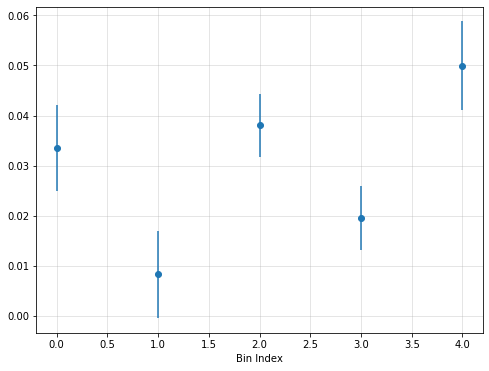

In [13]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)

df = data[sect][data[sect]['axis'] == "q2"]
ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o', 
            linestyle='')
ax.set_xlabel('Bin Index')
ax.grid(alpha=0.4)

In [14]:
def max_likelihood_mean(x, x_err):
    return np.sum(x / x_err**2) / np.sum(1.0 / x_err**2)

In [15]:
sector_stats = sector_data.groupby(['axis', 'axis_bin']).aggregate({
    'par_0' : list,
    'err_0' : list
}).reset_index()

In [16]:
sector_stats['par_0'] = sector_stats['par_0'].apply(lambda x: np.array(x))
sector_stats['err_0'] = sector_stats['err_0'].apply(lambda x: np.array(x))
sector_stats['max_likelihood_mean_0'] = sector_stats.apply(
    lambda r: max_likelihood_mean(r['par_0'], r['err_0']), axis=1)

In [17]:
sector_stats

,axis,axis_bin,par_0,err_0,max_likelihood_mean_0
0,missing_mass,0,"[0.041903525590896606, 0.02963590994477272, 0....","[0.006551288068294525, 0.005433388054370879, 0...",0.027709
1,missing_mass,1,"[0.040500480681657784, 0.052776459604501724, 0...","[0.0074306963942945, 0.007739575114101171, 0.0...",0.054448
2,missing_mass,2,"[0.038894206285476685, 0.04064291715621948, 0....","[0.00711019290611148, 0.007683878764510155, 0....",0.038915
3,missing_mass,3,"[0.025445155799388885, 0.05492173880338669, 0....","[0.007987680844962597, 0.006795440800487995, 0...",0.037707
4,missing_mass,4,"[0.007669094018638134, 0.02279648557305336, 0....","[0.007125467527657747, 0.006840434391051531, 0...",0.025448
5,pt,0,"[0.010591713711619377, 0.04837889969348908, 0....","[0.0056149098090827465, 0.008001253940165045, ...",0.025861
6,pt,1,"[0.027708625420927998, 0.04343023896217346, 0....","[0.005842472426593304, 0.006363311782479286, 0...",0.035395
7,pt,2,"[0.026648540049791336, 0.02953854575753212, 0....","[0.008167834021151066, 0.005872136447578669, 0...",0.037900
8,pt,3,"[0.0429554209113121, 0.04527267068624497, 0.04...","[0.005797587800770998, 0.008309231139719486, 0...",0.041308
9,pt,4,"[0.042043276131153114, 0.036354653537273414, 0...","[0.0076987198553979405, 0.0077074840664863595,...",0.032696


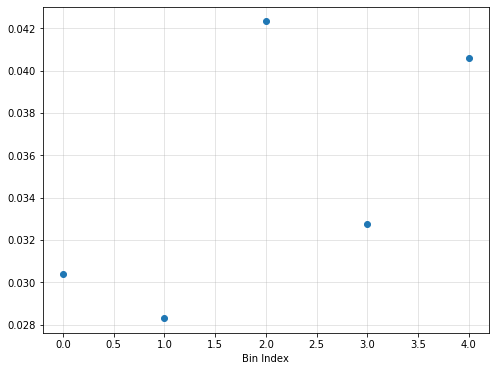

In [18]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)

df = sector_stats[sector_stats['axis'] == "q2"]
ax.plot(df['axis_bin'], df['max_likelihood_mean_0'], marker='o', 
            linestyle='')
ax.set_xlabel('Bin Index')
ax.grid(alpha=0.4)

In [19]:
sector_stats[sector_stats['axis'] == "x"].apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - row['max_likelihood_mean_0'])**2)), 
    axis=1)

15    0.009062
16    0.010055
17    0.011411
18    0.010701
19    0.006918
dtype: float64

In [20]:
sector_stats[sector_stats['axis'] == "x"].apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - np.mean(row['par_0']))**2)), 
    axis=1)

15    0.009043
16    0.010054
17    0.011389
18    0.010605
19    0.006900
dtype: float64

In [21]:
rmse = sector_stats.apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - row['max_likelihood_mean_0'])**2)), 
    axis=1)

In [22]:
sector_stats['rmse'] = rmse

In [23]:
sector_stats

,axis,axis_bin,par_0,err_0,max_likelihood_mean_0,rmse
0,missing_mass,0,"[0.041903525590896606, 0.02963590994477272, 0....","[0.006551288068294525, 0.005433388054370879, 0...",0.027709,0.011139
1,missing_mass,1,"[0.040500480681657784, 0.052776459604501724, 0...","[0.0074306963942945, 0.007739575114101171, 0.0...",0.054448,0.008791
2,missing_mass,2,"[0.038894206285476685, 0.04064291715621948, 0....","[0.00711019290611148, 0.007683878764510155, 0....",0.038915,0.006395
3,missing_mass,3,"[0.025445155799388885, 0.05492173880338669, 0....","[0.007987680844962597, 0.006795440800487995, 0...",0.037707,0.010007
4,missing_mass,4,"[0.007669094018638134, 0.02279648557305336, 0....","[0.007125467527657747, 0.006840434391051531, 0...",0.025448,0.010810
5,pt,0,"[0.010591713711619377, 0.04837889969348908, 0....","[0.0056149098090827465, 0.008001253940165045, ...",0.025861,0.015438
6,pt,1,"[0.027708625420927998, 0.04343023896217346, 0....","[0.005842472426593304, 0.006363311782479286, 0...",0.035395,0.006172
7,pt,2,"[0.026648540049791336, 0.02953854575753212, 0....","[0.008167834021151066, 0.005872136447578669, 0...",0.037900,0.009810
8,pt,3,"[0.0429554209113121, 0.04527267068624497, 0.04...","[0.005797587800770998, 0.008309231139719486, 0...",0.041308,0.009072
9,pt,4,"[0.042043276131153114, 0.036354653537273414, 0...","[0.0076987198553979405, 0.0077074840664863595,...",0.032696,0.008717
